In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input variables:  
## Bank client data:  
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
## Related with the last contact of the current campaign:  
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
## Other attributes:  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
## Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  

## Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')  

In [3]:
df = pd.read_csv('./bank.csv')

In [4]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

## Question of Interest

I would like to establish whether education level makes the likelyhood of subscription higher. One way to look at this would be to use a histogram which allows us to see the number of subscribers by education level. To do this we can perform a distribution analysis. 




In [10]:
df.count()

age           1988
job           1990
marital       2000
education     1896
default       2000
balance       2000
housing       2000
loan          2000
contact       1809
day           2000
month         2000
duration      2000
campaign      2000
pdays         2000
previous      2000
poutcome      1546
subscribed    2000
dtype: int64

In [11]:
df.education.unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [12]:
df.education.value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [23]:
df_subscribers = df.where(df.subscribed == "yes").dropna(how="all")
df_non_subscribers = df.where(df.subscribed == "no").dropna(how="all")

In [27]:
df_subscribers 

age           job  marital  education default  balance housing loan  \
1000  46.0    management  married        NaN      no   2466.0      no   no   
1001  54.0    technician  married  secondary      no   2102.0     yes   no   
1002  24.0       student   single  secondary      no   4126.0      no   no   
1003  29.0    management   single        NaN      no    560.0      no   no   
1004  27.0       student   single   tertiary      no  13107.0     yes   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
1995  20.0       student   single        NaN      no   2785.0      no   no   
1996  28.0        admin.   single  secondary      no    127.0      no   no   
1997  81.0       retired  married    primary      no   1154.0      no   no   
1998  46.0      services  married    primary      no   4343.0     yes   no   
1999  40.0  entrepreneur  married  secondary      no   6403.0      no   no   

        contact   day month  duration  campaign  pdays  previous poutcome  \
1000  telephone   1.0   apr     216.0       3.0  370.0       1.0  failure   
1001   cellular   5.0   apr     547.0       1.0  626.0       2.0  failure   
1002   cellular   5.0   apr     907.0       4.0  185.0       7.0  failure   
1003   cellular   5.0   apr     459.0       1.0  307.0       1.0  failure   
1004   cellular   6.0   apr     661.0       1.0  314.0       2.0  failure   
...         ...   ...   ...       ...       ...    ...       ...      ...   
1995   cellular  16.0   sep     327.0       2.0   -1.0       0.0      NaN   
1996   cellular  16.0   sep    1334.0       2.0   -1.0       0.0      NaN   
1997  telephone  17.0   sep     231.0       1.0   -1.0       0.0      NaN   
1998        NaN  20.0   sep     185.0       1.0   -1.0       0.0      NaN   
1999   cellular  22.0   sep     208.0       2.0   -1.0       0.0      NaN   

     subscribed  
1000        yes  
1001        yes  
1002        yes  
1003        yes  
1004        yes  
...         ...  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes  

[1000 rows x 17 columns]

In [28]:
subscriber_education_frequency = df_subscribers.education.value_counts()

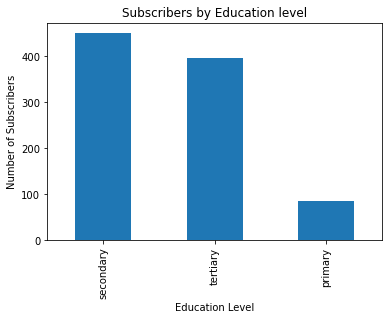

In [30]:
# Plot the frequency table for Number of Subscribers by education level
subscriber_education_frequency.plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Number of Subscribers')
plt.title('Subscribers by Education level')
plt.show()

It would be beneficial to normalize the numbers to percentage terms so we can compare likelihoods of subscription by education now that we have looked at the frequency. 

In [35]:
raw_frequency = df.education.value_counts()
raw_frequency

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [36]:
subscriber_education_frequency

secondary    451
tertiary     396
primary       84
Name: education, dtype: int64

In [45]:
print(f"Primary Education Subscriber Rate: {int(subscriber_education_frequency['primary']/raw_frequency['primary']*100)}%")
print(f"Secondary Education Subscriber Rate: {int(subscriber_education_frequency['secondary']/raw_frequency['secondary']*100)}%")
print(f"Tertiary Education Subscriber Rate: {int(subscriber_education_frequency['tertiary']/raw_frequency['tertiary']*100)}%")

Primary Education Subscriber Rate: 38%
Secondary Education Subscriber Rate: 45%
Tertiary Education Subscriber Rate: 57%


Interestingly, we see that the highest rate of subscription is amongst tertiary educated clients. We can delve further into the analysis by looking at the age of tertiary educated subscribers and seeing if that has any bearing on the likelihood of subscription and also on the balance. 

In [58]:
tertiary_educated_subscribers = df_subscribers.where(df.education == "tertiary").dropna(how="all")

First off lets take a quick look at the relationship between age and balance using a correlaction heat map and pair plots. 

In [59]:
sns.heatmap(tertiary_educated_subscribers.corr());

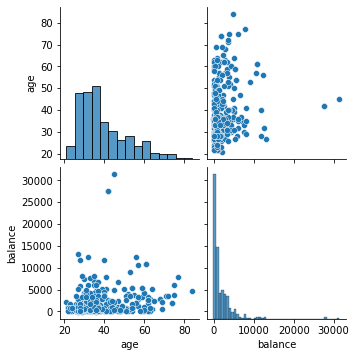

In [60]:
sns.pairplot(data=tertiary_educated_subscribers[['age','balance']].dropna())
plt.show()

Checking the correlation heat map and pair plots, we can see that age and balance are not strongly correlated. It appears that most tertiary educated subscribers keep a similar balance with a few outliers. Finally we can check to see if the age of tertiary subscribers affects the likelyhood of subscription using a histogram.

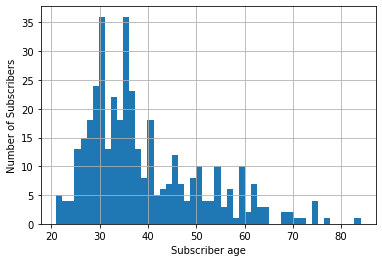

In [61]:
tertiary_educated_subscribers.age.hist(bins=50)
plt.xlabel('Subscriber age')
plt.ylabel('Number of Subscribers')
plt.show()

# Conclusion

Among tertiary educated subscribers, we can see that the subscriber's age plays a significant role with the majority of subscribers being between the age of 20 and 40 years. Based on this analysis we could suggest that 20 to 30 year old tertiary educated people are most likely to become subscribers and hence could be a focus point of successful campaigns to generate new subscribers for term deposits. Additionally, marketers and campaign managers could look to develop strategies for other categories where they are not performing as well. 
  
This analysis would reflect some of my own expectations about the type of subscriber for term deposit. Tertiary educated people can earn more money (broadly speaking!) than people with lower education qualifications. There is insufficient data in the dataset to confirm that assumption though, so for now it's just an assumption. Tertiary educated people may not earn anymore but may value saving/investing more than spending the money.  

It will be interesting to perform further analysis on the other categories and see if any interesting trends appear there. 